In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot, dates
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [33]:
data = pd.read_csv('data/listings_summary.csv')
data.shape

(48377, 16)

In [34]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0


In [35]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [36]:
df = data.groupby(['neighbourhood_group'])['price'].mean().reset_index()
df

,neighbourhood_group,price
0,Bronx,85.787744
1,Brooklyn,122.902045
2,Manhattan,199.501534
3,Queens,99.017769
4,Staten Island,118.883008


In [37]:
data.number_of_reviews.max()

654

In [38]:
data.query('number_of_reviews == 654')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11262,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,654,2019-09-02,14.43,2,341


In [39]:
ranked = data.groupby(['host_name'])['number_of_reviews'].count().sort_values(ascending=False).reset_index()
ranked = ranked.head(5)
ranked

,host_name,number_of_reviews
0,Michael,415
1,Sonder (NYC),387
2,David,384
3,John,295
4,Alex,257


Text(0, 0.5, 'Host')

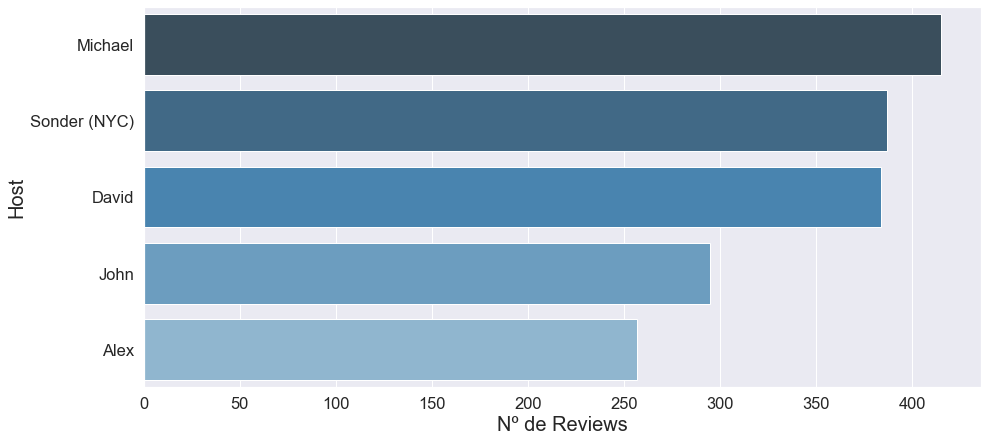

In [40]:
rcParams['figure.figsize'] = 15,7

sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
fig = sns.barplot(y='host_name', x='number_of_reviews', data=ranked,palette="Blues_d", ci="sd")
fig.set_xlabel("Nº de Reviews",fontsize=20)
fig.set_ylabel("Host",fontsize=20)

In [41]:
ranked.iloc[0]['number_of_reviews']

415

In [42]:
data.price.max()

10000

In [43]:
df.groupby("neighbourhood_group").price.mean().sort_values(ascending=False).reset_index()\
      .round(2).sort_values("price", ascending=False)\
      .assign(avg_price=lambda x: x.pop("price").apply(lambda y: "%.2f" % y))

,neighbourhood_group,avg_price
0,Manhattan,199.50
1,Brooklyn,122.90
2,Staten Island,118.88
3,Queens,99.02
4,Bronx,85.79


In [44]:
data = pd.read_csv('data/listings_summary.csv')

In [45]:
data['room_type'].count()

48377

In [46]:
data['room_type'].value_counts()

Entire home/apt    24898
Private room       21852
Shared room         1192
Hotel room           435
Name: room_type, dtype: int64

In [47]:
(data['room_type'].value_counts()/data['room_type'].count())*100

Entire home/apt    51.466606
Private room       45.170226
Shared room         2.463981
Hotel room          0.899188
Name: room_type, dtype: float64

In [48]:
df = data.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='Quantity')
df = df.rename(columns={'neighbourhood_group': 'District', 'room_type':'Room Type'})
df['Percentage'] = df.groupby(['District'])['Quantity'].apply(lambda x:100 * x / float(x.sum()))

df

,District,Room Type,Quantity,Percentage
0,Bronx,Entire home/apt,392,34.813499
1,Bronx,Private room,671,59.591474
2,Bronx,Shared room,63,5.595027
3,Brooklyn,Entire home/apt,9364,47.159549
4,Brooklyn,Hotel room,66,0.332393
5,Brooklyn,Private room,9985,50.287067
6,Brooklyn,Shared room,441,2.220991
7,Manhattan,Entire home/apt,12828,60.557995
8,Manhattan,Hotel room,329,1.553132
9,Manhattan,Private room,7559,35.684275


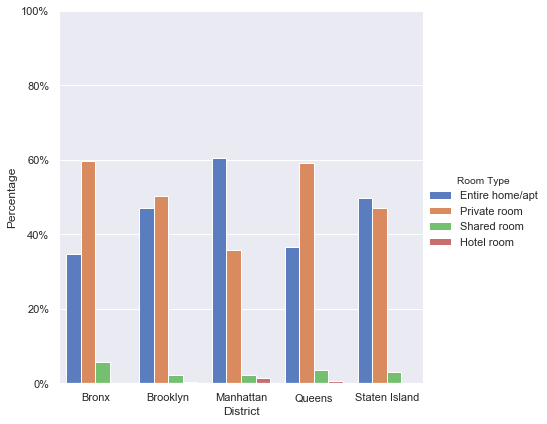

In [49]:
from  matplotlib.ticker import PercentFormatter

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20.7,15.27)})
fig = sns.catplot(y='Percentage', x='District', hue="Room Type", data=df, height=6, kind="bar", palette="muted", ci=95);
fig.set(ylim=(0, 100))


for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

In [50]:
demand_df = data[data.last_review.notnull()]
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38726 entries, 1 to 48353
Data columns (total 16 columns):
id                                38726 non-null int64
name                              38719 non-null object
host_id                           38726 non-null int64
host_name                         38710 non-null object
neighbourhood_group               38726 non-null object
neighbourhood                     38726 non-null object
latitude                          38726 non-null float64
longitude                         38726 non-null float64
room_type                         38726 non-null object
price                             38726 non-null int64
minimum_nights                    38726 non-null int64
number_of_reviews                 38726 non-null int64
last_review                       38726 non-null object
reviews_per_month                 38726 non-null float64
calculated_host_listings_count    38726 non-null int64
availability_365                  38726 non-null int64

In [51]:
demand_df.loc[:,'last_review'] = pd.to_datetime(demand_df.loc[:,'last_review'])
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38726 entries, 1 to 48353
Data columns (total 16 columns):
id                                38726 non-null int64
name                              38719 non-null object
host_id                           38726 non-null int64
host_name                         38710 non-null object
neighbourhood_group               38726 non-null object
neighbourhood                     38726 non-null object
latitude                          38726 non-null float64
longitude                         38726 non-null float64
room_type                         38726 non-null object
price                             38726 non-null int64
minimum_nights                    38726 non-null int64
number_of_reviews                 38726 non-null int64
last_review                       38726 non-null datetime64[ns]
reviews_per_month                 38726 non-null float64
calculated_host_listings_count    38726 non-null int64
availability_365                  38726 non-nu

In [52]:
demand_df.sort_values('last_review', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48353,38553155,hotel pennsylvania,241978859,Demia,Manhattan,Chelsea,40.75093,-73.99135,Private room,55,1,1,2019-09-12,1.00,1,288
40278,33493942,Mid Century modern room 1 minute to Subway,251817531,Kieu,Brooklyn,Bedford-Stuyvesant,40.68913,-73.95639,Private room,75,2,19,2019-09-12,5.48,4,270
40546,33680825,Studio on East Williamsburg,17524733,David,Brooklyn,Bushwick,40.68383,-73.90857,Entire home/apt,65,6,7,2019-09-12,1.49,1,18
3151,2011212,West Village Charm and Quiet!,7683195,Brenton,Manhattan,SoHo,40.72778,-74.00860,Entire home/apt,162,2,23,2019-09-12,0.33,1,290
40435,33607370,MARCELO’S ROOM \nClose to JFK airport and LGA,245710234,Marcelo Y Lucio,Queens,Elmhurst,40.73125,-73.87251,Private room,38,1,41,2019-09-12,7.64,4,352


(733773.0, 737332.0)

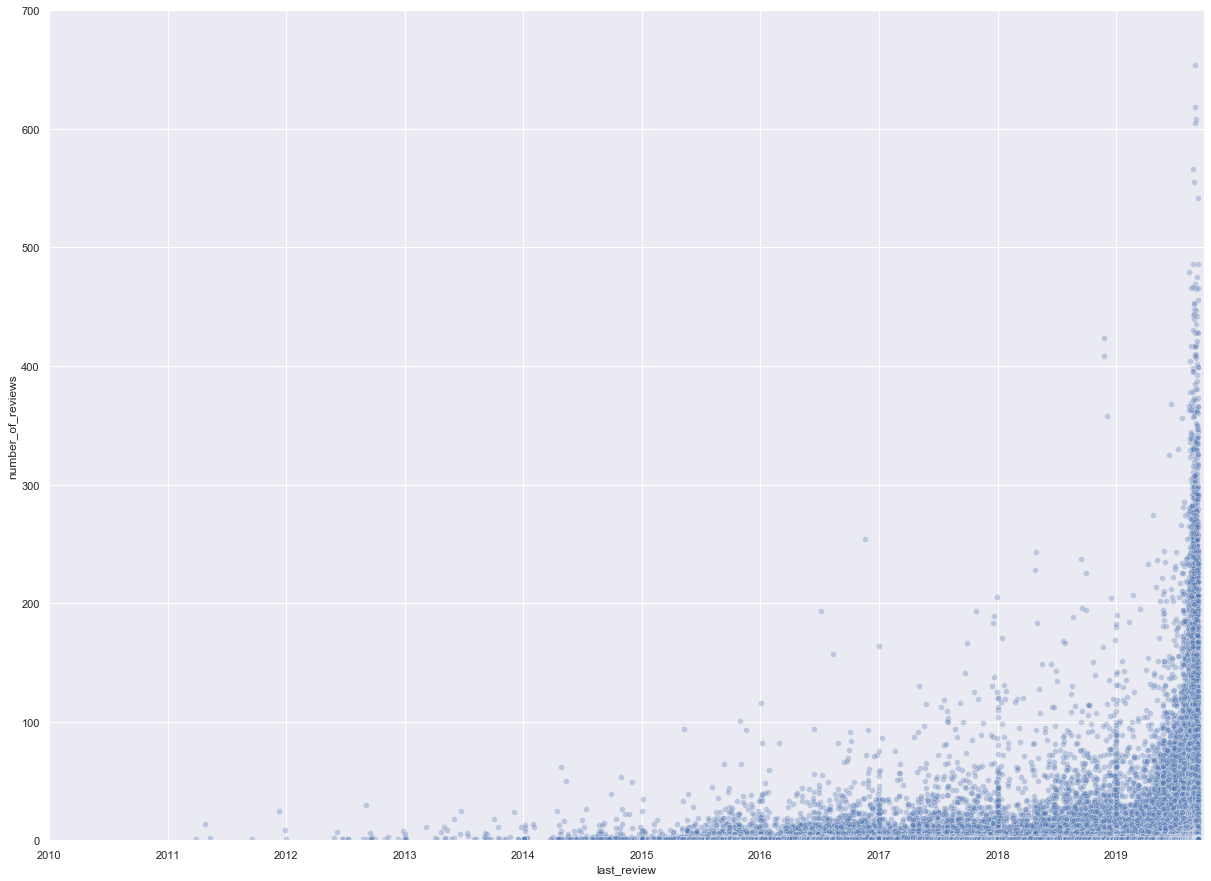

In [53]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = sns.scatterplot(x="last_review", y="number_of_reviews", data=demand_df, alpha=.3);
fig.set(ylim=(0, 700))
fig.set_xlim([datetime.date(2010, 1, 1), datetime.date(2019, 9, 30)])

(733773.0, 737332.0)

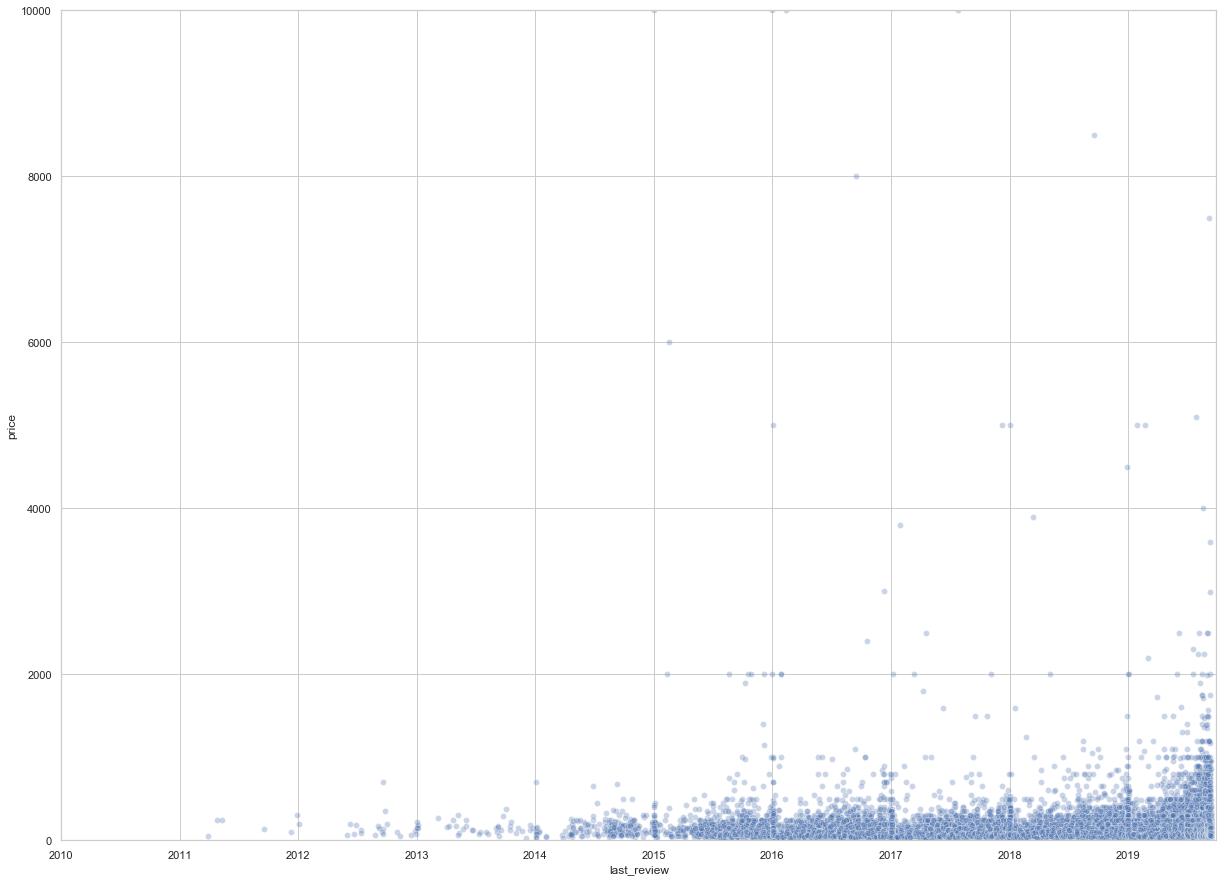

In [55]:
import datetime

fig = sns.scatterplot(x="last_review", y="price", data=demand_df, alpha=.3, palette='colorblind');
fig.set(ylim=(0, 10000))
fig.set_xlim([datetime.date(2010, 1, 1), datetime.date(2019, 9, 30)])